In [1]:
!pip install pandas
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install nltk
!pip install matplotlib

In [24]:
import codecs
import re
import copy
import collections
import re

In [ ]:
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image

In [3]:
import numpy as np
import pandas as pd

import nltk

In [4]:
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer

In [5]:
from __future__ import division


In [6]:
import matplotlib
%matplotlib inline

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shres\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords

In [9]:
with codecs.open('E:/Books/Simulation/PS6code/RomeoJuliet.txt', "r", encoding="utf-8") as f:
    text_RJ = f.read()
with codecs.open('E:/Books/Simulation/PS6code/On-Sunset-Highways.txt', "r", encoding="utf-8") as f:
    text_OS = f.read()


In [10]:
esw = stopwords.words('english')
esw.append("would")

In [11]:
word_pattern = re.compile('^\w+$')

In [12]:
def get_text_counter(text):
    tokens = WordPunctTokenizer().tokenize(PorterStemmer().stem(text))
    tokens = list(map(lambda x: x.lower(), tokens))
    tokens = filter(lambda x: x.isalpha(), tokens) # remove numbers
    tokens = [token for token in tokens if re.match(word_pattern, token) and token not in esw]
    return collections.Counter(tokens), len(tokens)

In [13]:
def make_df(counter, size):
    abs_freq = np.array([el[1] for el in counter])
    rel_freq = abs_freq / size
    index = [el[0] for el in counter]
    df = pd.DataFrame(data=np.array([abs_freq, rel_freq]).T, index=index, columns=["Absolute frequency", "Relative frequency"])
    df.index.name = "Most common words"
    return df

In [14]:
rj_counter, rj_size = get_text_counter(text_RJ)


In [15]:
make_df(rj_counter.most_common(15), rj_size)

,Absolute frequency,Relative frequency
Most common words,,
romeo,312.0,0.021973
thou,277.0,0.019508
juliet,186.0,0.013100
thy,165.0,0.011621
capulet,155.0,0.010916
love,151.0,0.010635
nurse,149.0,0.010494
thee,139.0,0.009789
lady,117.0,0.008240


In [16]:
rj_df = make_df(rj_counter.most_common(1000), rj_size)
rj_df.to_csv("RJ2_1000.csv")

In [17]:
os_counter, os_size = get_text_counter(text_OS)

In [18]:
make_df(os_counter.most_common(15), os_size)

,Absolute frequency,Relative frequency
Most common words,,
one,508.0,0.009165
road,421.0,0.007596
san,380.0,0.006856
us,321.0,0.005791
california,307.0,0.005539
miles,306.0,0.005521
mission,279.0,0.005034
little,260.0,0.004691
many,254.0,0.004583


In [19]:
os_df = make_df(os_counter.most_common(1000), os_size)
os_df.to_csv("OS2_1000.csv")

In [20]:
all_counter = rj_counter + os_counter

In [21]:
all_df = make_df(os_counter.most_common(1000), 1)
most_common_words = all_df.index.values

In [22]:
df_data = []
for word in most_common_words:
    rj_c = rj_counter.get(word, 0) / rj_size
    os_c = os_counter.get(word, 0) / os_size
    d = abs(rj_c - os_c)
    df_data.append([rj_c, os_c, d])
    
    

In [23]:
dist_df = pd.DataFrame(data=df_data, index=most_common_words,
                          columns=["RJ relative frequency", "OS relative frequency", "Differences in relative frequency"])
dist_df.index.name = "Most common words"
dist_df.sort_values("Differences in relative frequency", ascending=False, inplace=True)
    

In [24]:
dist_df.head(20)

,RJ relative frequency,OS relative frequency,Differences in relative frequency
Most common words,,,
road,0.000000,0.007596,0.007596
shall,0.007747,0.000523,0.007224
san,0.000000,0.006856,0.006856
come,0.006831,0.000902,0.005929
night,0.006198,0.000469,0.005729
california,0.000000,0.005539,0.005539
enter,0.005775,0.000289,0.005486
miles,0.000070,0.005521,0.005450
mission,0.000000,0.005034,0.005034


In [25]:
dist_df.to_csv("dist_RJOS.csv")

In [25]:
words = re.findall(r'\w+', open('E:\Books\Simulation\ps6code\RomeoJuliet.txt', encoding='utf-8').read().lower())
words_counter = Counter(words)

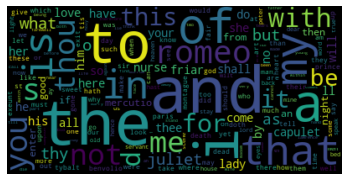

In [26]:
wc = WordCloud(background_color="black")
wc.generate_from_frequencies(words_counter)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()